# To find the correlation between Attrition column and other columns in the genaral_data.csv dataset 

In [1]:
#to import the requried the lib
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [2]:
#to import the dataset into the notebook

ds = pd.read_csv("general_data.csv")
ds.head(7)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0


>The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [3]:
ds.info()
# we see that there are no null values in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
ds.shape

(4410, 24)

In [5]:
# Dataset columns
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Numerical features overview

In [6]:
ds.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Assignment  Day 11

       **The correlation between the columns**

In [7]:
# Make a copy of the original sourcefile
ds_copy1 = ds.copy()

In [8]:
# to convert Yes = 1 and No = 0 into a new column Target
ds_copy1['Target'] = ds_copy1['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [9]:
# to display the new coluumn Target comparing it by our old column Attrition
ds_copy1[['Attrition','Target']].head(10)

,Attrition,Target
0,No,0
1,Yes,1
2,No,0
3,No,0
4,No,0
5,No,0
6,Yes,1
7,No,0
8,No,0
9,No,0


In [10]:
# To drop the columns which are not of any signifigance anymore
ds_copy1 = ds_copy1.drop(['Attrition', 'EmployeeCount', 'EmployeeID', 'StandardHours', 'Over18'], axis=1)

In [11]:
ds_copy1.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Target'],
      dtype='object')

# Correlations with the target(i.e Attrition) with each column 
## Method 1
> by using pearsonr method and passing each column

In [12]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.Age)
print(stats,p)

-0.15920500686577965 1.996801615886744e-26


In [13]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.DistanceFromHome)
print(stats,p)

-0.009730141010179674 0.5182860428050771


In [14]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.Education)
print(stats,p)

-0.015111167710968713 0.3157293177118575


In [15]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.JobLevel)
print(stats,p)

-0.010289713287495042 0.49451717271828405


In [16]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.MonthlyIncome)
print(stats,p)

-0.031176281698115007 0.03842748490600132


In [17]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.StockOptionLevel)
print(stats,p)

-0.006838852403261513 0.6498072937475723


In [18]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.TrainingTimesLastYear)
print(stats,p)

-0.049430576244255 0.0010247061915365072


In [19]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.YearsAtCompany)
print(stats,p)

-0.1343922139899772 3.1638831224877484e-19


In [20]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.YearsSinceLastPromotion)
print(stats,p)

-0.03301877514258434 0.028330336189396753


In [21]:
stats,p = pearsonr(ds_copy1.Target , ds_copy1.YearsWithCurrManager)
print(stats,p)

-0.15619931590162847 1.7339322652896276e-25


# Correlations with the target(i.e Attrition) with each column 
## Method 2
> by using corr() method 

In [22]:
# Find correlations with the target(i.e Attrition) with each column and sort 
correlations = ds_copy1.corr()['Target'].sort_values()
print(correlations) 

TotalWorkingYears         -0.170338
Age                       -0.159205
YearsWithCurrManager      -0.156199
YearsAtCompany            -0.134392
TrainingTimesLastYear     -0.049431
YearsSinceLastPromotion   -0.033019
MonthlyIncome             -0.031176
Education                 -0.015111
JobLevel                  -0.010290
DistanceFromHome          -0.009730
StockOptionLevel          -0.006839
PercentSalaryHike          0.032533
NumCompaniesWorked         0.042345
Target                     1.000000
Name: Target, dtype: float64


# Correlation Matrix 
## Method 1
> by using corr() method and display as table 

In [23]:
#this is the genralized correlation matrix by maping eacch column with each other
ds_copy1.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299243,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013843,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584,-0.009730
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016250,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358,-0.015111
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.009875,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020726,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304,-0.031176
NumCompaniesWorked,0.299243,-0.013843,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667,0.042345
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.030860,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864,0.032533
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017163,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757,-0.006839
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.036957,-0.033787,0.238807,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800,-0.170338
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032286,-0.037392,-0.069902,-0.040762,1.000000,-0.007894,0.016121,-0.013270,-0.049431


# Correlation Matrix 
## Method 2
> By using seaborn lib and display as heatmap 

To plot a heatmap to visualize the correlation between Attrition(target) and the columns.

In [24]:
import seaborn as sns

In [25]:
# Calculate correlations
corr = ds_copy1.corr()

# to create a zero matrix of size/shape corr
heatmap_mask = np.zeros_like(corr)

# Return the indices for the upper-triangle and mae them eual to 1
heatmap_mask[np.triu_indices_from(heatmap_mask)] = True
#print(heatmap_mask)

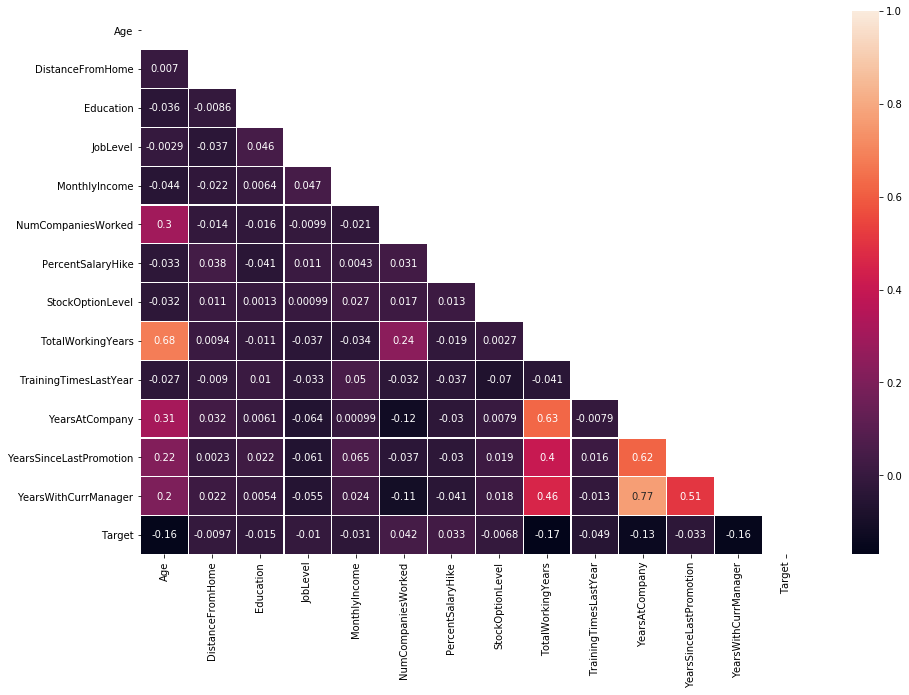

In [26]:
# Heatmap for visualizeing 
# to set the size of the map uusing mathplotlib.pyplot
plt.figure(figsize=(15, 10))
# heatmap parameters used 
# mask -> masks cell which is true(1)
# annot ->  to display values inside each cell
# linewidths -> for spacing bwtn cells 
sns.heatmap(corr,mask=heatmap_mask, annot=True, linewidths=.2)

### As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.